In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
listings = pd.read_csv("../data/listings.csv")
prices = pd.read_csv("../data/stock_prices.csv")
volumes = pd.read_csv("../data/stock_volumes.csv")
market_caps = pd.read_csv("../data/stock_mktcaps.csv")

In [3]:
missing = market_caps.isna().sum()
for i in missing.index:    
    if missing[i] >= 1:
        market_caps = market_caps.drop(columns=[i])



In [4]:
market_caps["date"] = pd.to_datetime(market_caps['date'])

market_caps = market_caps.set_index("date")


In [5]:
market_caps = market_caps.apply(np.float64)

In [6]:
market_caps.dtypes

930060    float64
699903    float64
879841    float64
314909    float64
15362F    float64
           ...   
362603    float64
502585    float64
152288    float64
779661    float64
317449    float64
Length: 224, dtype: object

**CLUSTERING Market Caps**

In [41]:
from sklearn.cluster import KMeans

In [42]:
km = KMeans(n_clusters=5)
km.fit(market_caps[list(market_caps.columns)])


KMeans(n_clusters=5)

In [43]:
clusters = pd.DataFrame(km.cluster_centers_, columns=list(market_caps.columns), index=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5'])

In [44]:
market_caps['Cluster'] = km.labels_ + 1
market_caps

,930060,699903,879841,314909,15362F,315452,884570,992762,879650,315449,...,936980,361367,152198,871347,362603,502585,152288,779661,317449,Cluster
date,,,,,,,,,,,,,,,,,,,,,
2003-01-02,2658.66,547.34,674.37,20901.61,392.39,268.07,1983.24,2784.07,483.04,1585.67,...,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2835.91,1195.35,5
2003-01-03,2679.51,547.34,674.37,21305.57,388.42,268.07,1937.44,2858.64,483.04,1609.16,...,2240.00,16.35,26.20,53.90,214.82,20.54,14.10,2855.47,1195.35,5
2003-01-06,2669.09,547.34,674.37,21729.07,388.42,270.19,1937.44,2982.93,483.04,1609.16,...,2240.00,16.35,18.71,53.90,240.75,20.54,14.10,2865.25,1195.35,5
2003-01-07,2658.66,547.34,668.55,23129.91,388.42,270.19,1937.44,3082.36,483.04,1585.67,...,2240.00,19.32,18.71,53.90,240.75,20.54,14.10,2884.80,1195.35,5
2003-01-08,2658.66,547.34,668.55,22308.95,388.42,270.19,1937.44,3057.51,483.04,1550.43,...,2240.00,19.32,18.71,53.90,240.75,20.65,14.10,2894.58,1157.99,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,10915.28,86.36,760.07,113598.50,13739.52,659.73,2658.56,556.53,545.55,2607.55,...,44604.41,1680.98,132.46,2873.02,1431.21,622.73,2599.43,37927.40,21410.80,3
2021-06-25,10884.50,86.36,760.07,114861.70,13739.52,661.93,2658.56,556.53,545.55,2607.55,...,44604.41,1715.28,132.46,2873.02,1374.83,622.73,2530.42,37405.35,21212.56,3
2021-06-28,10736.07,86.36,760.07,111606.30,13739.52,625.64,2658.56,556.53,545.55,2607.55,...,44604.41,1654.02,132.46,2873.02,1379.17,622.73,2530.42,37146.55,21225.77,3


In [11]:
inertia = []
for k in range(1 , 21):
    estimator = KMeans(n_clusters=k)
    estimator.fit(market_caps[list(market_caps.columns)])
    inertia.append(estimator.inertia_)

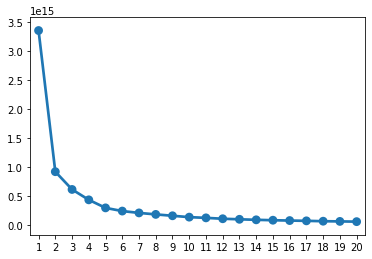

In [12]:
sns.pointplot(np.arange(1,21), inertia)

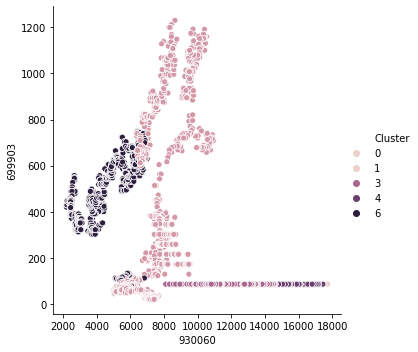

In [49]:
sns.relplot(x="930060", y="699903", data=market_caps, hue="Cluster")